In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=False)

sample_data_events_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                       'sample_audvis_filt-0-40_raw-eve.fif')
events = mne.read_events(sample_data_events_file)

raw.crop(tmax=90)  # in seconds; happens in-place
# discard events >90 seconds (not strictly necessary: avoids some warnings)
events = events[events[:, 0] <= raw.last_samp]

Opening raw data file C:\Users\dianu\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [2]:
raw.pick(['eeg']).load_data()
raw.info

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 13514  =      0.000 ...    90.001 secs...


<Info | 15 non-empty values
 bads: 1 items (EEG 053)
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 60 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 60
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>

In [3]:
channel_renaming_dict = {name: name.replace(' 0', '').lower()
                         for name in raw.ch_names}
_ = raw.rename_channels(channel_renaming_dict)  # happens in-place

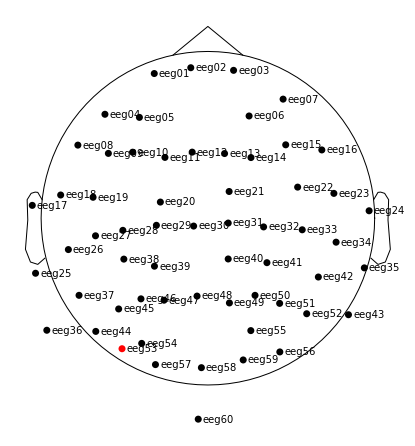

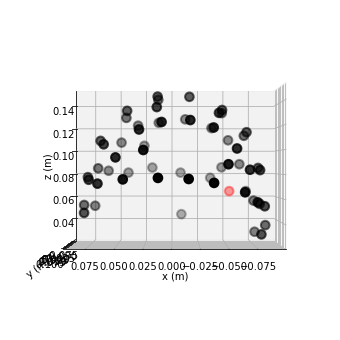

In [4]:
raw.plot_sensors(show_names=True)
fig = raw.plot_sensors('3d')

Not setting metadata
Not setting metadata
132 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 132 events and 151 original time points ...
1 bad epochs dropped
You seem to have overlapping epochs. Some event lines may be duplicated in the plot.
Using matplotlib as 2D backend.


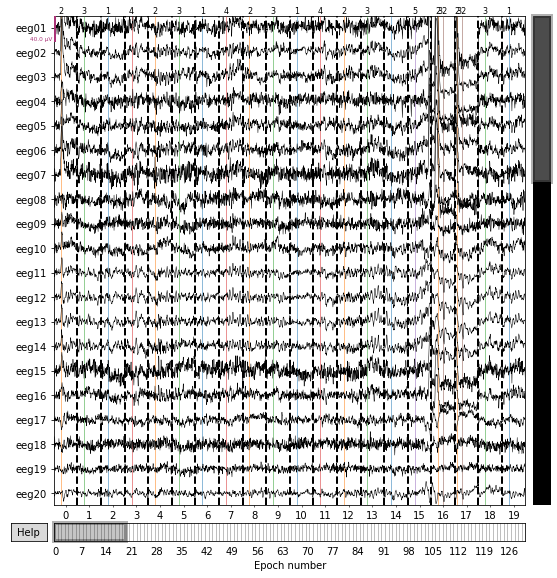

In [5]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'face': 5, 'buttonpress': 32}

epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.3, tmax=0.7,
                    preload=True)
fig = epochs.plot(events=events)

In [7]:
reject_criteria = dict(eeg=100e-6)  # 200 µV
_ = epochs.drop_bad(reject=reject_criteria)

    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg25']
    Rejecting  epoch based on EEG : ['e

In [8]:
l_aud = epochs['auditory/left'].average()
l_vis = epochs['visual/left'].average()

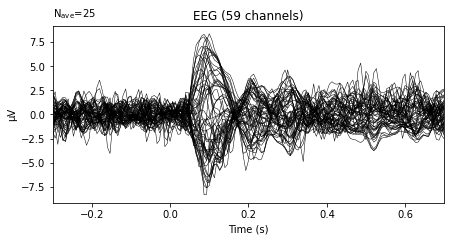

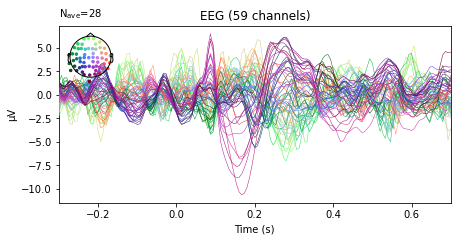

In [9]:
fig1 = l_aud.plot()
fig2 = l_vis.plot(spatial_colors=True)

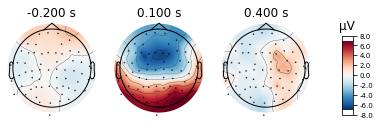

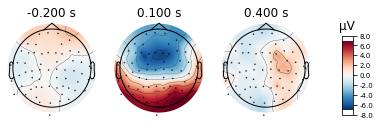

In [10]:
l_aud.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05)

Projections have already been applied. Setting proj attribute to True.


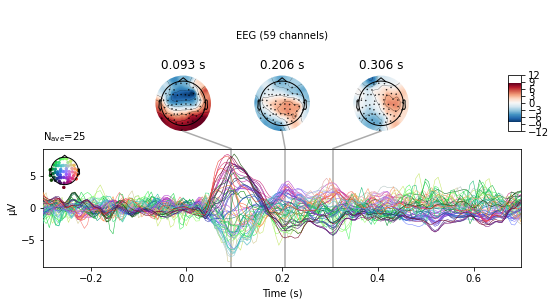

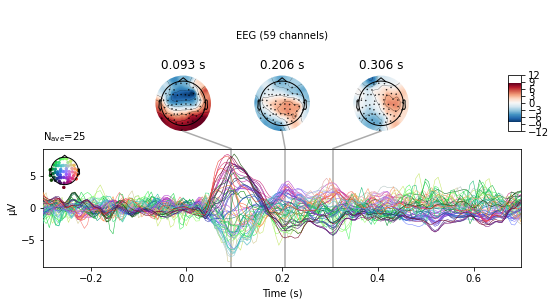

In [11]:
l_aud.plot_joint()